In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import widgets
from mestimators import *

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

In [2]:
def makeplot(estimator):
    x = np.linspace(-20,20)
    lw = 3.
    fs = 18
    
    f, ax = plt.subplots(1, 3, figsize=(11,3))
    ax[0].plot(x, estimator.cost(x), color='r', linewidth=lw)
    ax[0].set_title(r"Cost $\rho(x)$", fontsize=fs)
    ax[0].set_ylim([0,50])
    ax[1].plot(x, estimator.influence(x), color='g',  linewidth=lw)
    ax[1].set_title(r"Influence $\psi(x)$", fontsize=fs)
    ax[1].set_ylim([-10,10])
    ax[2].plot(x, estimator.weight(x), color='b',  linewidth=lw)
    ax[2].set_title(r"Weight $w(x)$", fontsize=fs)
    ax[2].set_ylim([0,2])

## $L_2$ Cost

The $L_2$ cost is your basic least-squares estimator.

\begin{align}
\rho(x) &= \dfrac{1}{2}x^2 &
\psi(x) &= x &
w(x) &= 1
\end{align}

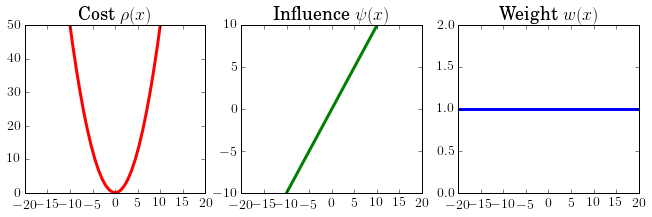

In [3]:
makeplot(L2())

## $L_1$ Cost

The $L_1$ cost is the least-absolute estimator.

\begin{align}
\rho(x) &= \left| x \right| &
\psi(x) &= \text{sign}(x) &
w(x) &= \dfrac{1}{\left| x \right|}
\end{align}

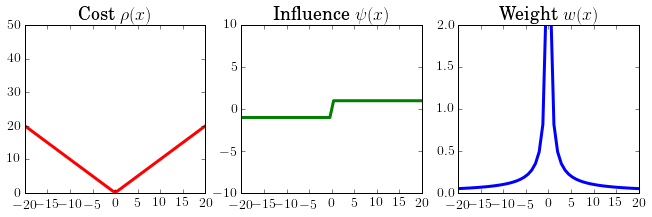

In [4]:
makeplot(L1())

## Cauchy Cost
The Cauchy cost is one flavour of robust M-estimator.

\begin{align}
\rho(x) &= \dfrac{k^2}{2} \log\left( 1 + \left( \dfrac{x}{c} \right)^2 \right) &
\psi(x) &= \dfrac{x}{1 + \left(\dfrac{x}{c} \right)^2} &
w(x) &= \dfrac{1}{1 + \left(\dfrac{x}{c} \right)^2}
\end{align}

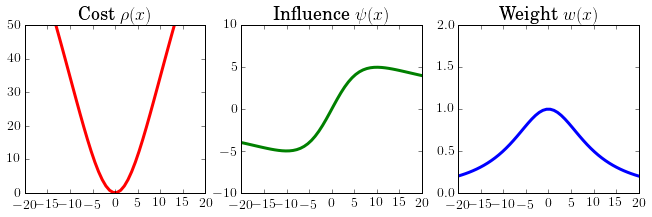

In [5]:
def plotCauchy(k):
    makeplot(Cauchy(k))
    
widgets.interact(plotCauchy, k=(1,20,1));

## Huber Cost

The Huber cost is another type of robust M-estimator. It behaves like a $L_2$ cost up to a certain value $k$, and like a $L_1$ cost for larger values.

\begin{align}
\rho(x) &= \left\{
\begin{array}{l}
    \dfrac{1}{2} x^2 \\
    k \left( \left| x \right| - \dfrac{k}{2} \right)
\end{array} \right. &
\psi(x) &= \left\{
\begin{array}{l}
    x \\
    k \text{ sign} \left( x \right)
\end{array} \right. &
w(x) &= \left\{
\begin{array}{ll}
    1 & \text{if} \left| x \right| \leq k\\
    \dfrac{k}{\left| x \right|} & \text{if} \left| x \right| \geq k
\end{array} \right.
\end{align}


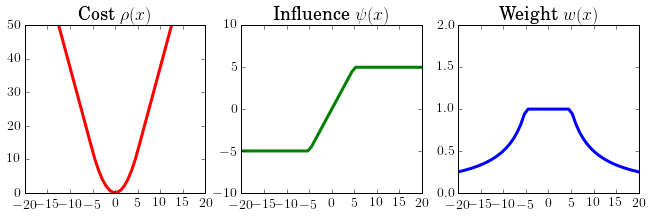

In [6]:
def plotHuber(k):
    makeplot(Huber(k))
    
widgets.interact(plotHuber, k=(0.5,10,0.5));